In [1]:
%pip install mysql-connector-python

   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.4 MB ? eta -:--:--
   --- ------------------------------------ 1.6/16.4 MB 6.8 MB/s eta 0:00:03
   ------ --------------------------------- 2.6/16.4 MB 6.6 MB/s eta 0:00:03
   --------- ------------------------------ 3.9/16.4 MB 6.3 MB/s eta 0:00:02
   ---------- ----------------------------- 4.5/16.4 MB 5.2 MB/s eta 0:00:03
   ----------- ---------------------------- 4.7/16.4 MB 4.5 MB/s eta 0:00:03
   -------------- ------------------------- 6.0/16.4 MB 4.6 MB/s eta 0:00:03
   ----------------- ---------------------- 7.1/16.4 MB 4.7 MB/s eta 0:00:02
   ------------------- -------------------- 8.1/16.4 MB 4.9 MB/s eta 0:00:02
   ----------------------- ---------------- 9.4/16.4 MB 5.0 MB/s eta 0:00:02
   -------------------------- ------------- 10.7/16.4 MB 5.1 MB/s eta 0:00:02
   ----------------------------- ---------- 12.1/16.4 MB 5.3 MB/s eta 0:00:01
   --------

In [2]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import mysql.connector
import pandas as pd

# Replace with your actual database info
conn = mysql.connector.connect(
    host="127.0.0.1",       # e.g. 'localhost' or public IP
    user="root",   # e.g. 'root'
    password="Sdas1234@",
    database="ecomm_return"
)

# Example SQL query to fetch data
query = "SELECT * FROM return_analysis"

# Load into DataFrame
df = pd.read_sql(query, conn)

# Close connection
conn.close()

# Show first few rows
df.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_6192\3965042192.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,Order_ID,Customer_ID,Purchase_Date,Purchase_Hour,Product_Category,Product_Price,Quantity,Total_Purchase_Amount,Payment_Method,Customer_Age,return_code,Customer_Name,Gender,Churn,Return_Status
0,1,21035,2023-09-09,0 days 06:11:30,Home,237.0,2,1088.0,Cash,50,1,Peter Watson,Female,1,Return
1,2,37125,2021-06-08,0 days 03:13:38,Electronics,207.0,5,783.0,Credit Card,24,0,Terry Campos,Female,0,No Return
2,3,37125,2022-08-23,0 days 06:10:45,Electronics,311.0,2,2992.0,Cash,24,0,Terry Campos,Female,0,No Return
3,4,37125,2022-11-30,0 days 07:04:02,Home,158.0,4,1047.0,Cash,24,0,Terry Campos,Female,0,No Return
4,5,41840,2022-09-16,0 days 06:06:54,Clothing,10.0,5,3540.0,Credit Card,48,0,Ronald Berger,Male,0,No Return


In [ ]:
#EXPLORATORY DATA ANALYSIS

In [19]:
# return status by gender
import numpy as np
return_status_by_gender = df.groupby(['Gender','Return_Status'])['return_code'].mean().reset_index()
print(return_status_by_gender)

   Gender Return_Status  return_code
0  Female     No Return          0.0
1  Female        Return          1.0
2    Male     No Return          0.0
3    Male        Return          1.0


In [8]:
%pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 5.7 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/8.1 MB 5.9 MB/s eta 0:00:01
   ------------------- -------------------- 3.9/8.1 MB 6.2 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 6.4 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.1 MB 6.4 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 6.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.2 MB 7.2 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 6.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ------------------- -------------------- 1.3/2.7 MB 7.0 MB/s eta 0:00:01
   ------------------------------

In [9]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


C:\Users\HP\AppData\Local\Temp\ipykernel_6192\3341518618.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_group.sort_values('Return_Rate', ascending=False), x='Return_Rate', y='Product_Category', palette = 'viridis')


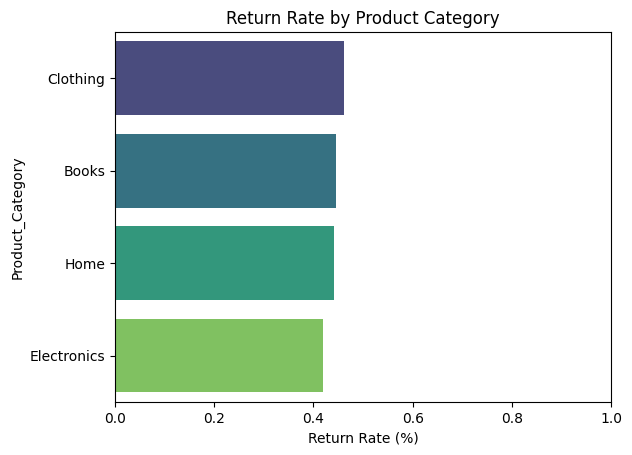

In [14]:
category_group = df.groupby('Product_Category')['Return_Status'].apply(lambda x: (x == 'Return').mean()).reset_index(name='Return_Rate')

import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data=category_group.sort_values('Return_Rate', ascending=False), x='Return_Rate', y='Product_Category', palette = 'viridis')
plt.title("Return Rate by Product Category")
plt.xlabel("Return Rate (%)")
plt.xlim(0, 1)
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_6192\1721170557.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=return_status_by_gender, x='Gender', y='return_code', palette = 'coolwarm')


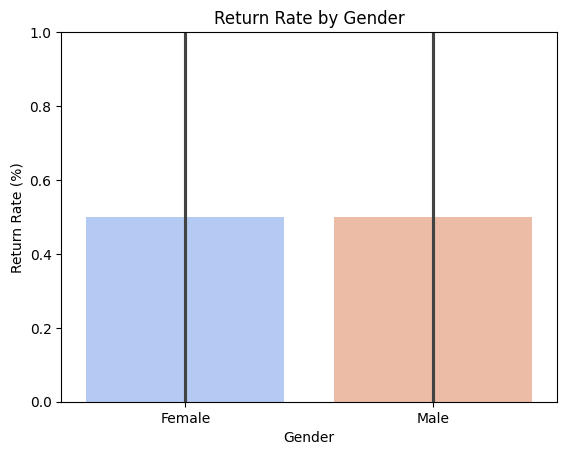

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data=return_status_by_gender, x='Gender', y='return_code', palette = 'coolwarm')
plt.title("Return Rate by Gender")
plt.ylabel("Return Rate (%)")
plt.ylim(0, 1)  # 1 means 100%
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_6192\1149766049.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Payment_Method', y=df['Return_Status'].eq('Return').astype(int), data=df, palette ='YlOrBr')


Text(0.5, 1.0, 'Return Rate by Payment Method')

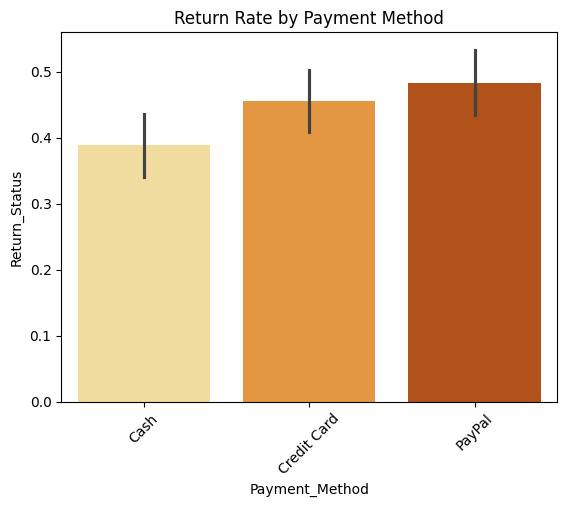

In [23]:
sns.barplot(x='Payment_Method', y=df['Return_Status'].eq('Return').astype(int), data=df, palette ='YlOrBr')
plt.xticks(rotation=45)
plt.title("Return Rate by Payment Method")

In [25]:
!pip install scikit-learn


   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   --- ------------------------------------ 1.0/10.7 MB 6.2 MB/s eta 0:00:02
   ------- -------------------------------- 2.1/10.7 MB 5.5 MB/s eta 0:00:02
   ------------- -------------------------- 3.7/10.7 MB 5.9 MB/s eta 0:00:02
   ------------------ --------------------- 5.0/10.7 MB 6.2 MB/s eta 0:00:01
   ----------------------- ---------------- 6.3/10.7 MB 6.0 MB/s eta 0:00:01
   ---------------------------- ----------- 7.6/10.7 MB 6.0 MB/s eta 0:00:01
   --------------------------------- ------ 8.9/10.7 MB 6.1 MB/s eta 0:00:01
   -------------------------------------- - 10.2/10.7 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 10.7/10.7 MB 5.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.0 MB ? eta -:--:--
   - -------------------------------------- 1.0/41.0 MB 6.8 MB/s eta 0:00:06
   -- ------------------------------------- 2.6/41.0 MB 6.4 MB/s eta 0:00:07
   ---- ---

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Encode categorical vars
df_model = df.copy()
le = LabelEncoder()
for col in ['Gender', 'Payment_Method', 'Product_Category']:
    df_model[col] = le.fit_transform(df_model[col].astype(str))

# Convert Return_Status to binary
df_model['Return'] = df_model['Return_Status'].apply(lambda x: 1 if x == 'Return' else 0)

# Feature selection
features = ['Customer_Age', 'Gender', 'Payment_Method', 'Total_Purchase_Amount', 'Product_Category']
X = df_model[features]
y = df_model['Return']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.53      0.78      0.63       191
           1       0.36      0.16      0.22       154

    accuracy                           0.50       345
   macro avg       0.45      0.47      0.43       345
weighted avg       0.46      0.50      0.45       345

[[149  42]
 [130  24]]
